In [4]:
import pandas as pd
import numpy as np
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Modelo de Regressão Logítica Binária

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Luiz Fávero


**Modelo de Classificação**

### Objetivo

Predizer a probabilidade de ocorrer um evento em função de uma ou mais variáveis explicativas ou classificar uma observação em alguma categoria específica.

- **Variável Dependente:** Binária Qualitativa
- **Variável Explicativa:** métrica ou não métrica

### Contexto

Atrasado: 0 Não, 1 Sim <br>
Dist: distância percorrida até a escola <br>
Sem: quantidade de semáforos <br>

atrasado (quali) ~ dist (quant) + sem (quant)

Patrasado = 1/ 1 + e^-(alpha + Bdist + Bsem)


**Padrão da variável Binária Dependente** <br>
Y = 1 evento <br>
Y = 0 não evento <br>

Evento: categoria alternativa <br>
Não Evento: categoria referência

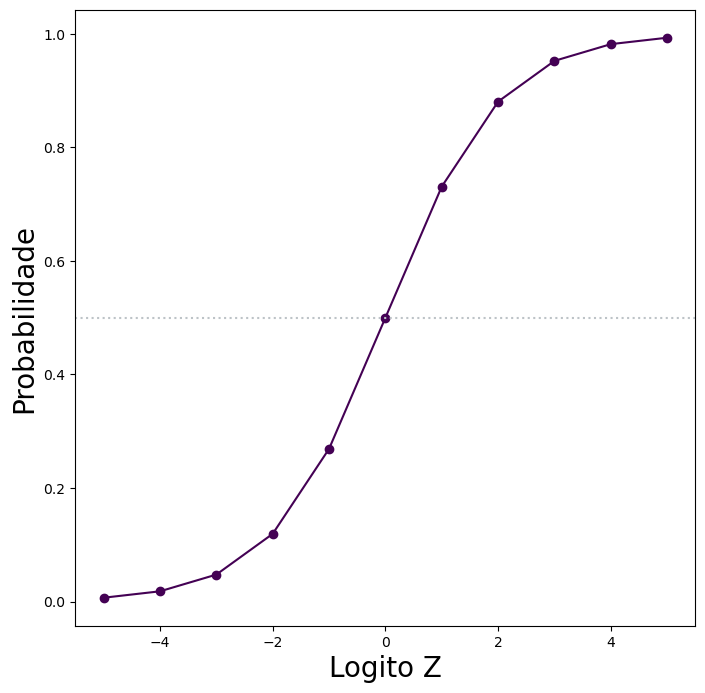

In [3]:
#Estabelecendo uma função para a probabilidade de ocorrência de um evento

from math import exp

#Estabelecendo uma função para a probabilidade de ocorrência de um evento
def prob(z):
    return 1 / (1 + exp(-z))


# In[ ]: Plotando a curva sigmóide teórica de ocorrência de um evento para um
#range do logito z entre -5 e +5

logitos = []
probs = []

for i in np.arange(-5,6):
    logitos.append(i)
    probs.append(prob(i))
    
df = pd.DataFrame({'logito':logitos,'probs':probs})

plt.figure(figsize=(8,8))
plt.plot(df.logito, df.probs, color="#440154FF")
plt.scatter(df.logito, df.probs, color = "#440154FF")
plt.axhline(y = df.probs.mean(), color = '#bdc3c7', linestyle = ':')
plt.xlabel("Logito Z", fontsize=20)
plt.ylabel("Probabilidade", fontsize=20)
plt.show()

In [5]:
#Importa base e transforma em objeto
rData = pyreadr.read_r(r'bases\Atrasado.RData')

#Verifica o nomne do objeto
print(rData.keys())

odict_keys(['Atrasado'])


In [6]:
#Transforma o objeto em um pandas DataFrame
atrasado = rData['Atrasado']
atrasado['atrasado'] = atrasado['atrasado'].astype('int')
atrasado.head()

,estudante,atrasado,dist,sem
0,Gabriela,0,12.5,7.0
1,Patrícia,0,13.3,10.0
2,Gustavo,0,13.4,8.0
3,Letícia,0,23.5,7.0
4,Luiz Ovídio,0,9.5,8.0


In [7]:
atrasado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    int32  
 2   dist       100 non-null    float64
 3   sem        100 non-null    float64
dtypes: float64(2), int32(1), object(1)
memory usage: 2.9+ KB


In [8]:
atrasado.describe()

,atrasado,dist,sem
count,100.000000,100.000000,100.000000
mean,0.590000,14.073000,10.210000
std,0.494311,4.330112,1.578229
min,0.000000,1.000000,5.000000
25%,0.000000,12.000000,10.000000
50%,1.000000,13.350000,10.000000
75%,1.000000,16.125000,10.000000
max,1.000000,29.000000,18.000000


In [9]:
atrasado.groupby('atrasado')['dist'].count()

atrasado
0    41
1    59
Name: dist, dtype: int64

## Aplicando Modelo Logístico

O modelo que apresentar o MAIOR Log-Likelihood é o mais ajustado.

In [16]:
import statsmodels.api as sm

# Caso for usar a função sem a formula
X = atrasado[['dist', 'sem']]
y = atrasado.atrasado

#Adiciona coluna para cálculo da constante
X = sm.add_constant(X)

modelo_atrasos_1 = sm.Logit(y,X).fit()

#Função com Formula
#modelo_atrasos = sm.Logit.from_formula(formula='atrasado ~ dist + sem', data=atrasado).fit()
modelo_atrasos_1.summary()

Optimization terminated successfully.
         Current function value: 0.504664
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.2544
Time:                        16:54:40   Log-Likelihood:                -50.466
converged:                       True   LL-Null:                       -67.686
Covariance Type:            nonrobust   LLR p-value:                 3.324e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.1665      8.442     -3.100      0.002     -42.713      -9.620
dist           0.1904      0.076      2.493      0.013       0.041       0.340
sem            2.3629      0.795      2.972      0.003       0.804       3.921
==============================================================================
"""

### Outro Modeo de Gerar o Modelo de Regressão

In [17]:

import statsmodels.formula.api as smf
import statsmodels.api as sm

modelo_atrasos_2 = smf.glm(formula='atrasado ~ dist + sem', data=atrasado,
                         family=sm.families.Binomial()).fit()

In [18]:
modelo_atrasos_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50.466
Date:                Tue, 21 Mar 2023   Deviance:                       100.93
Time:                        16:54:48   Pearson chi2:                     86.7
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2913
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.1665      8.442     -3.100      0.002     -42.712      -9.621
dist           0.1904      0.076      2.493      0.013       0.041       0.340
sem            2.3629      0.795      2.972      0.003       0.804       3.921
==============================================================================
"""

In [19]:
# In[ ]: Outro modo mais completo de apresentar os outputs do modelo,
#pela função 'summary_col'
from statsmodels.iolib.summary2 import summary_col


summary_col([modelo_atrasos_2],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,-26.1665***
,(8.4420)
dist,0.1904**
,(0.0764)
sem,2.3629***
,(0.7951)
N,100
Log-lik,-50.47


## Previsão

In [20]:
#const = 1
#dist = 7
# sem = 10

modelo_atrasos_1.predict([1, 7,10])

array([0.23056604])

In [21]:
# In[ ]: Fazendo predições para o 'modelo_atrasos'.
#Exemplo: qual a probabilidade média de se chegar atrasado quando o
#trajeto tem 7 km e passa-se por 10 semáforos no percurso?

modelo_atrasos_2.predict(pd.DataFrame({'dist':[7], 'sem':[10]}))

0    0.230566
dtype: float64

### 23% de probabilidade

## Indicadores

Compara modelos levando em consideração a quantidade do tamanho da amostra e variáveis

- #### Akaike Info Criterion: Quanto menor Melhor
    - Análogo ao R2 Ajustado
    - AIC = -2 LLmodelo + 2(K+1) onde k = qtde de betas
    
- #### Bayesian Info Criterion: Quanto menor Melhor
    - BIC = -2LLmodelo + (k+1)ln(n)

In [26]:
list_ = [modelo_atrasos_1.llr.round(3), 
         modelo_atrasos_1.llr_pvalue.round(5),
         modelo_atrasos_1.llf.round(3),
         modelo_atrasos_1.aic,
         modelo_atrasos_1.bic]

summary = pd.DataFrame(list_, index=[['chi2', 'p', 'Log-Likelihood','AIC', 'BIC']], columns=['values'])

summary

,values
chi2,34.439000
p,0.000000
Log-Likelihood,-50.466000
AIC,106.932759
BIC,114.748269


In [27]:
#Incluindo Valores de probabilidade preditos na base
atrasado['phat'] = modelo_atrasos.predict(X)
atrasado

,estudante,atrasado,dist,sem,phat
0,Gabriela,0,12.5,7.0,0.000712
1,Patrícia,0,13.3,10.0,0.498561
2,Gustavo,0,13.4,8.0,0.008903
3,Letícia,0,23.5,7.0,0.005751
4,Luiz Ovídio,0,9.5,8.0,0.004257
...,...,...,...,...,...
95,Sheila,1,24.0,10.0,0.884040
96,Pedro,1,10.0,10.0,0.346606
97,Horácio,1,9.4,10.0,0.321210
98,Leandro,1,14.2,10.0,0.541301


In [28]:
# Cálculo da previsão
1/(1+np.exp(-(-26.167 + 0.190*13.3 + 2.363*10)))

0.4975000208331246

In [29]:
modelo_atrasos_2.predict(pd.DataFrame({'dist':[13.3], 'sem':[10]}))

0    0.498561
dtype: float64

ERROR! Session/line number was not unique in database. History logging moved to new session 296


## Confusion Matrix e Cutoff

Com Cutoff de 50%

Taxa média de cutoff no Brasil no crédito de financiamento: 22%


Períodos com taxa de juros subindo o cutoff pode subir associado à taxa de juros


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(observado,predicts,cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
    
    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)
    
    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Acurácia':[acuracia]})
    return indicadores

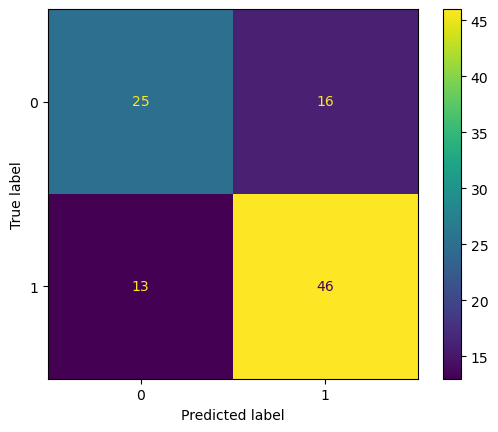

,Sensitividade,Especificidade,Acurácia
0,0.779661,0.609756,0.71


In [31]:
#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=atrasado['atrasado'],
                predicts=atrasado['phat'], 
                cutoff=0.5)

## Cálculo Manual dos Indicadores

In [13]:
from sklearn.metrics import confusion_matrix

cutoff = 0.5

predicted_classes = (atrasado.phat > cutoff).astype(int)

cm = pd.DataFrame(confusion_matrix(y, predicted_classes), 
                  index=['False', 'True'],
                  columns=['False', 'True'])
cm['Real'] = cm.T.sum()

In [14]:
cm

,False,True,Real
False,25,16,41
True,13,46,59


## Acurácia

Taxa de Acerto Global do Modelo

In [15]:
(25+46)/cm.Real.sum()

0.71

## Sensitividade ou Recall

Taxa de acerto apenas de quem foi evento

In [16]:
46/59

0.7796610169491526

## Especificidade

Taxa de Acerto de quem não foi evento

In [17]:
25/41

0.6097560975609756

## Precision

Taxa de acerto de quem foi classificado como evento<br>

Utilizado muit na área de saúde

In [19]:
46/(46+16)

0.7419354838709677

## F1 Score

Média armônica entre Precision e Recall

F1 Score: 2 * Recall * Precision / (Precision + Recall)

In [20]:
2*(46/59)*(46/(46+16))/(46/59 + (46/(46+16)))

0.7603305785123968

In [32]:
# Igualando critérios de especificidade e de sensitividade

#Tentaremos estabelecer um critério que iguale a probabilidade de
#acerto daqueles que chegarão atrasados (sensitividade) e a probabilidade de
#acerto daqueles que não chegarão atrasados (especificidade).

#ATENÇÃO: o que será feito a seguir possui fins didáticos, apenas. DE NENHUMA
#FORMA o procedimento garante a maximização da acurácia do modelo!

#Criação da função 'espec_sens' para a construção de um dataset com diferentes
#valores de cutoff, sensitividade e especificidade:

def espec_sens(observado,predicts):
    
    # adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [34]:
# Até o momento, foram extraídos 3 vetores: 'sensitividade',
#'especificidade' e 'cutoffs'. Assim, criamos um dataframe que contém
#os vetores mencionados

dados_plotagem = espec_sens(observado = atrasado['atrasado'],
                            predicts = atrasado['phat'])
dados_plotagem

,cutoffs,sensitividade,especificidade
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.170732
2,0.02,1.000000,0.170732
3,0.03,1.000000,0.170732
4,0.04,1.000000,0.170732
...,...,...,...
96,0.96,0.135593,1.000000
97,0.97,0.135593,1.000000
98,0.98,0.135593,1.000000
99,0.99,0.101695,1.000000


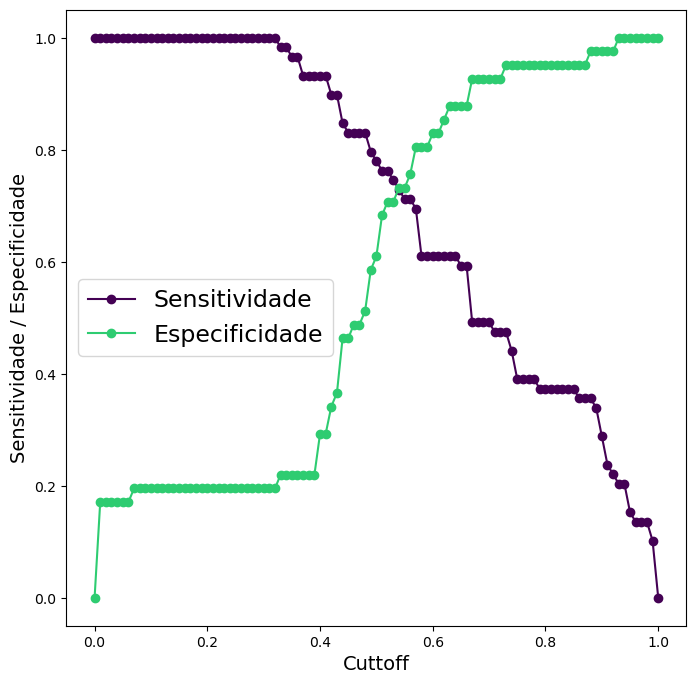

In [36]:
# In[ ]: Visualizando o novo dataframe 'dados_plotagem' e plotando os dados
#em um gráfico que mostra a variação da especificidade e da sensitividade
#em função do cutoff

plt.figure(figsize=(8,8))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color="#440154FF")
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color="#2ecc71")
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel("Cuttoff", fontsize=14)
plt.ylabel("Sensitividade / Especificidade", fontsize=14)
plt.show()

## Curva ROC ( Receiver Operating Characterist)

Maior a área debaixo da curva ROC melhor. <br>

Para aumentar a área é necessário incluir novas variáveis com betas estatisticamente significantes após stepwise

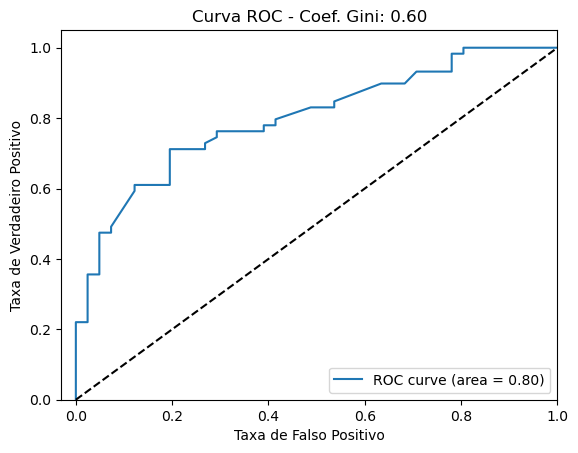

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y, atrasado.phat)
roc_auc = roc_auc_score(y, atrasado.phat)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()